In [1]:
from PIL import Image as PI
import pyocr
import pyocr.builders
import io
# conda install -c conda-forge tesseract

In [2]:
from wand.image import Image
from PIL import Image as PI
import pyocr
import pyocr.builders
import io
import pytesseract
import cv2
import numpy as np
import statistics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from wand.image import Image
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [4]:
# pyocr.get_available_tools()[0].get_available_languages()
tool = pyocr.get_available_tools()[0]
lang = tool.get_available_languages()[0]
lang

'eng'

In [5]:
pdf_path='C:\\Users\\subbarao\\Downloads\\Contracts\\one.pdf'
pdf_path

'C:\\Users\\subbarao\\Downloads\\Contracts\\one.pdf'

In [6]:
req_image = []
final_text = []

In [7]:
image_pdf = Image(filename=pdf_path, resolution=300)
image_jpeg = image_pdf.convert('jpeg')

In [8]:
for img in image_jpeg.sequence:
    img_page = Image(image=img)
    req_image.append(img_page.make_blob('jpeg'))

In [9]:
import time
def pdf2image():
    path = "C:\\Users\\subbarao\\Downloads\\Contracts\\One\\"
    page = 1
    for img in image_jpeg.sequence:
        img_per_page = Image(image = img)
        img_buf = path + str(page) + ".jpeg"
        print(page,time.time())
        img_per_page.save(filename=img_buf)
        page +=1
pdf2image()

1 1582525051.341249
2 1582525053.540853
3 1582525055.818457
4 1582525058.2364612
5 1582525061.6216671
6 1582525063.6808703
7 1582525065.8180745
8 1582525068.292881
9 1582525070.632885
10 1582525073.118095
11 1582525076.4877007
12 1582525077.9229033
13 1582525081.4765093
14 1582525084.8461154
15 1582525087.6229203
16 1582525091.616527
17 1582525095.8597345
18 1582525098.7925396
19 1582525101.257344
20 1582525103.9717486
21 1582525106.874354
22 1582525109.8539588
23 1582525112.4435635
24 1582525117.2951717


In [10]:
path = "C:\\Users\\subbarao\\Downloads\\Contracts\\One\\13.jpeg"
img = cv2.imread(path,0)
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin =255 - img_bin
cv2.imwrite("C:\\Users\\subbarao\\Downloads\\Contracts\\One\\Image_bin.jpeg",img_bin)

True

In [11]:
kernel_length = np.array(img).shape[1]//80
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,  (kernel_length,1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1,verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)

True

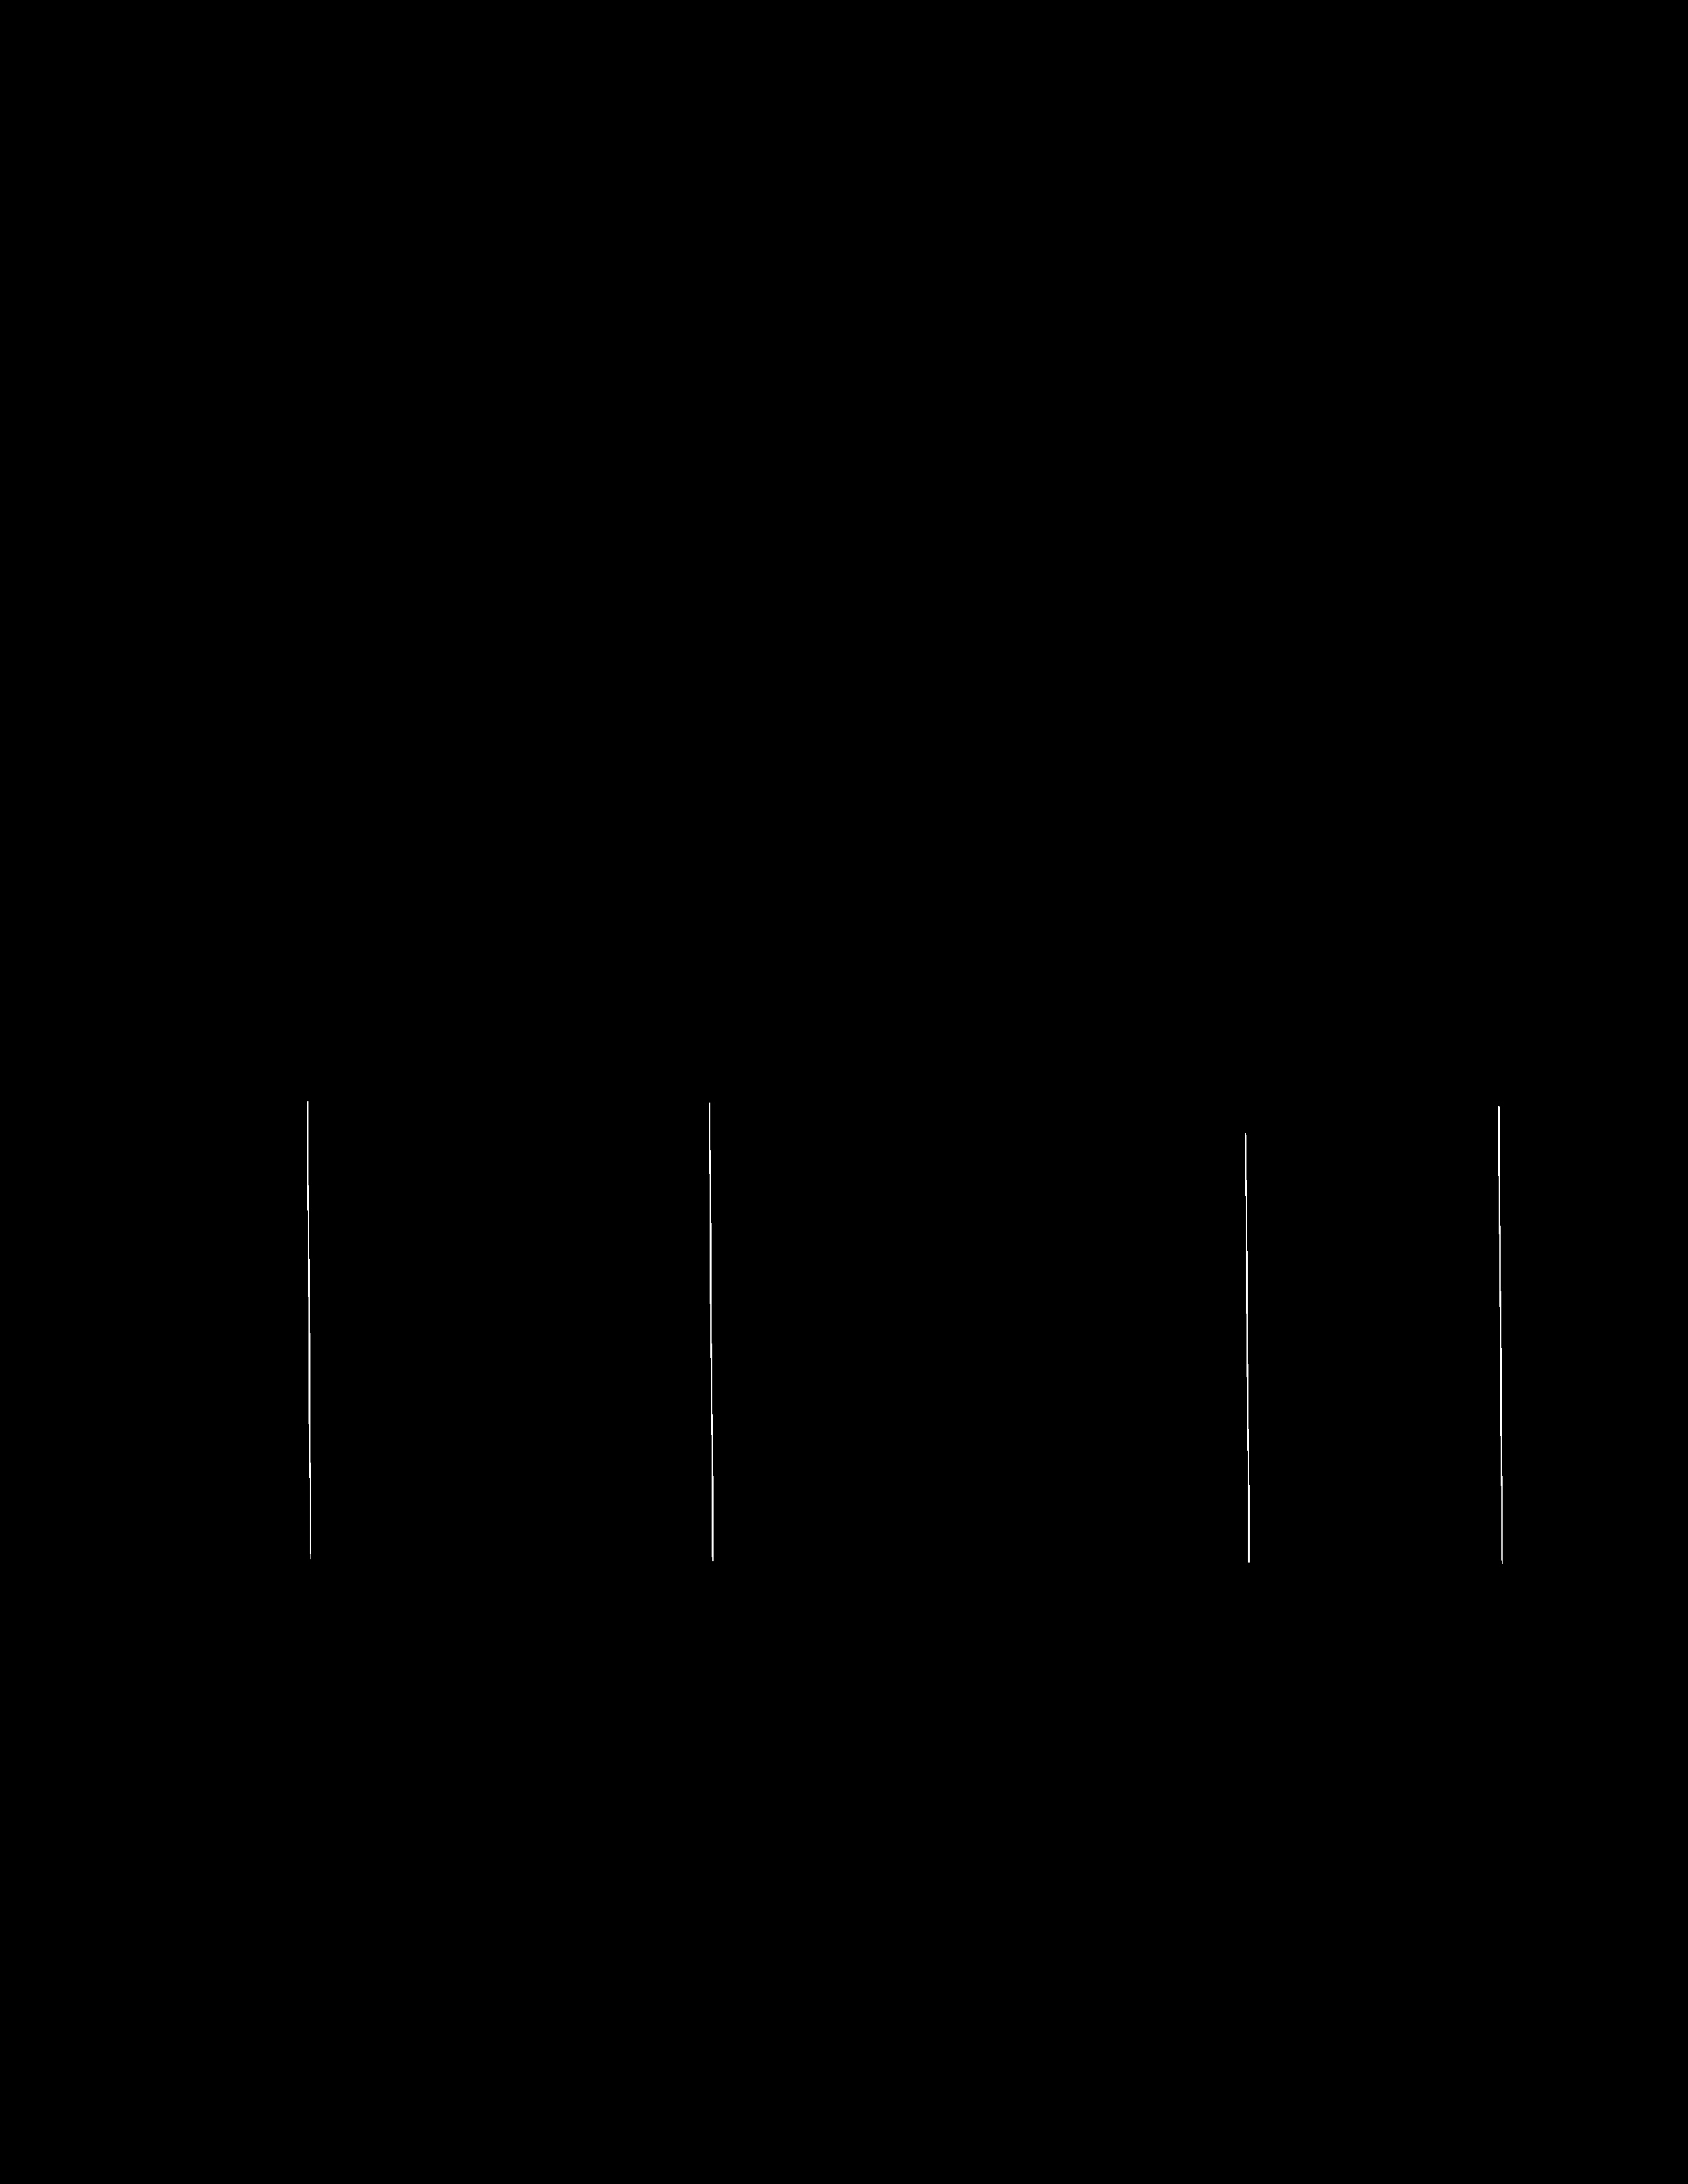

In [17]:
from IPython.core.display import Image as I 
from IPython.core.display import display as D
D(I('verticle_lines.jpg'))

In [18]:
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

True

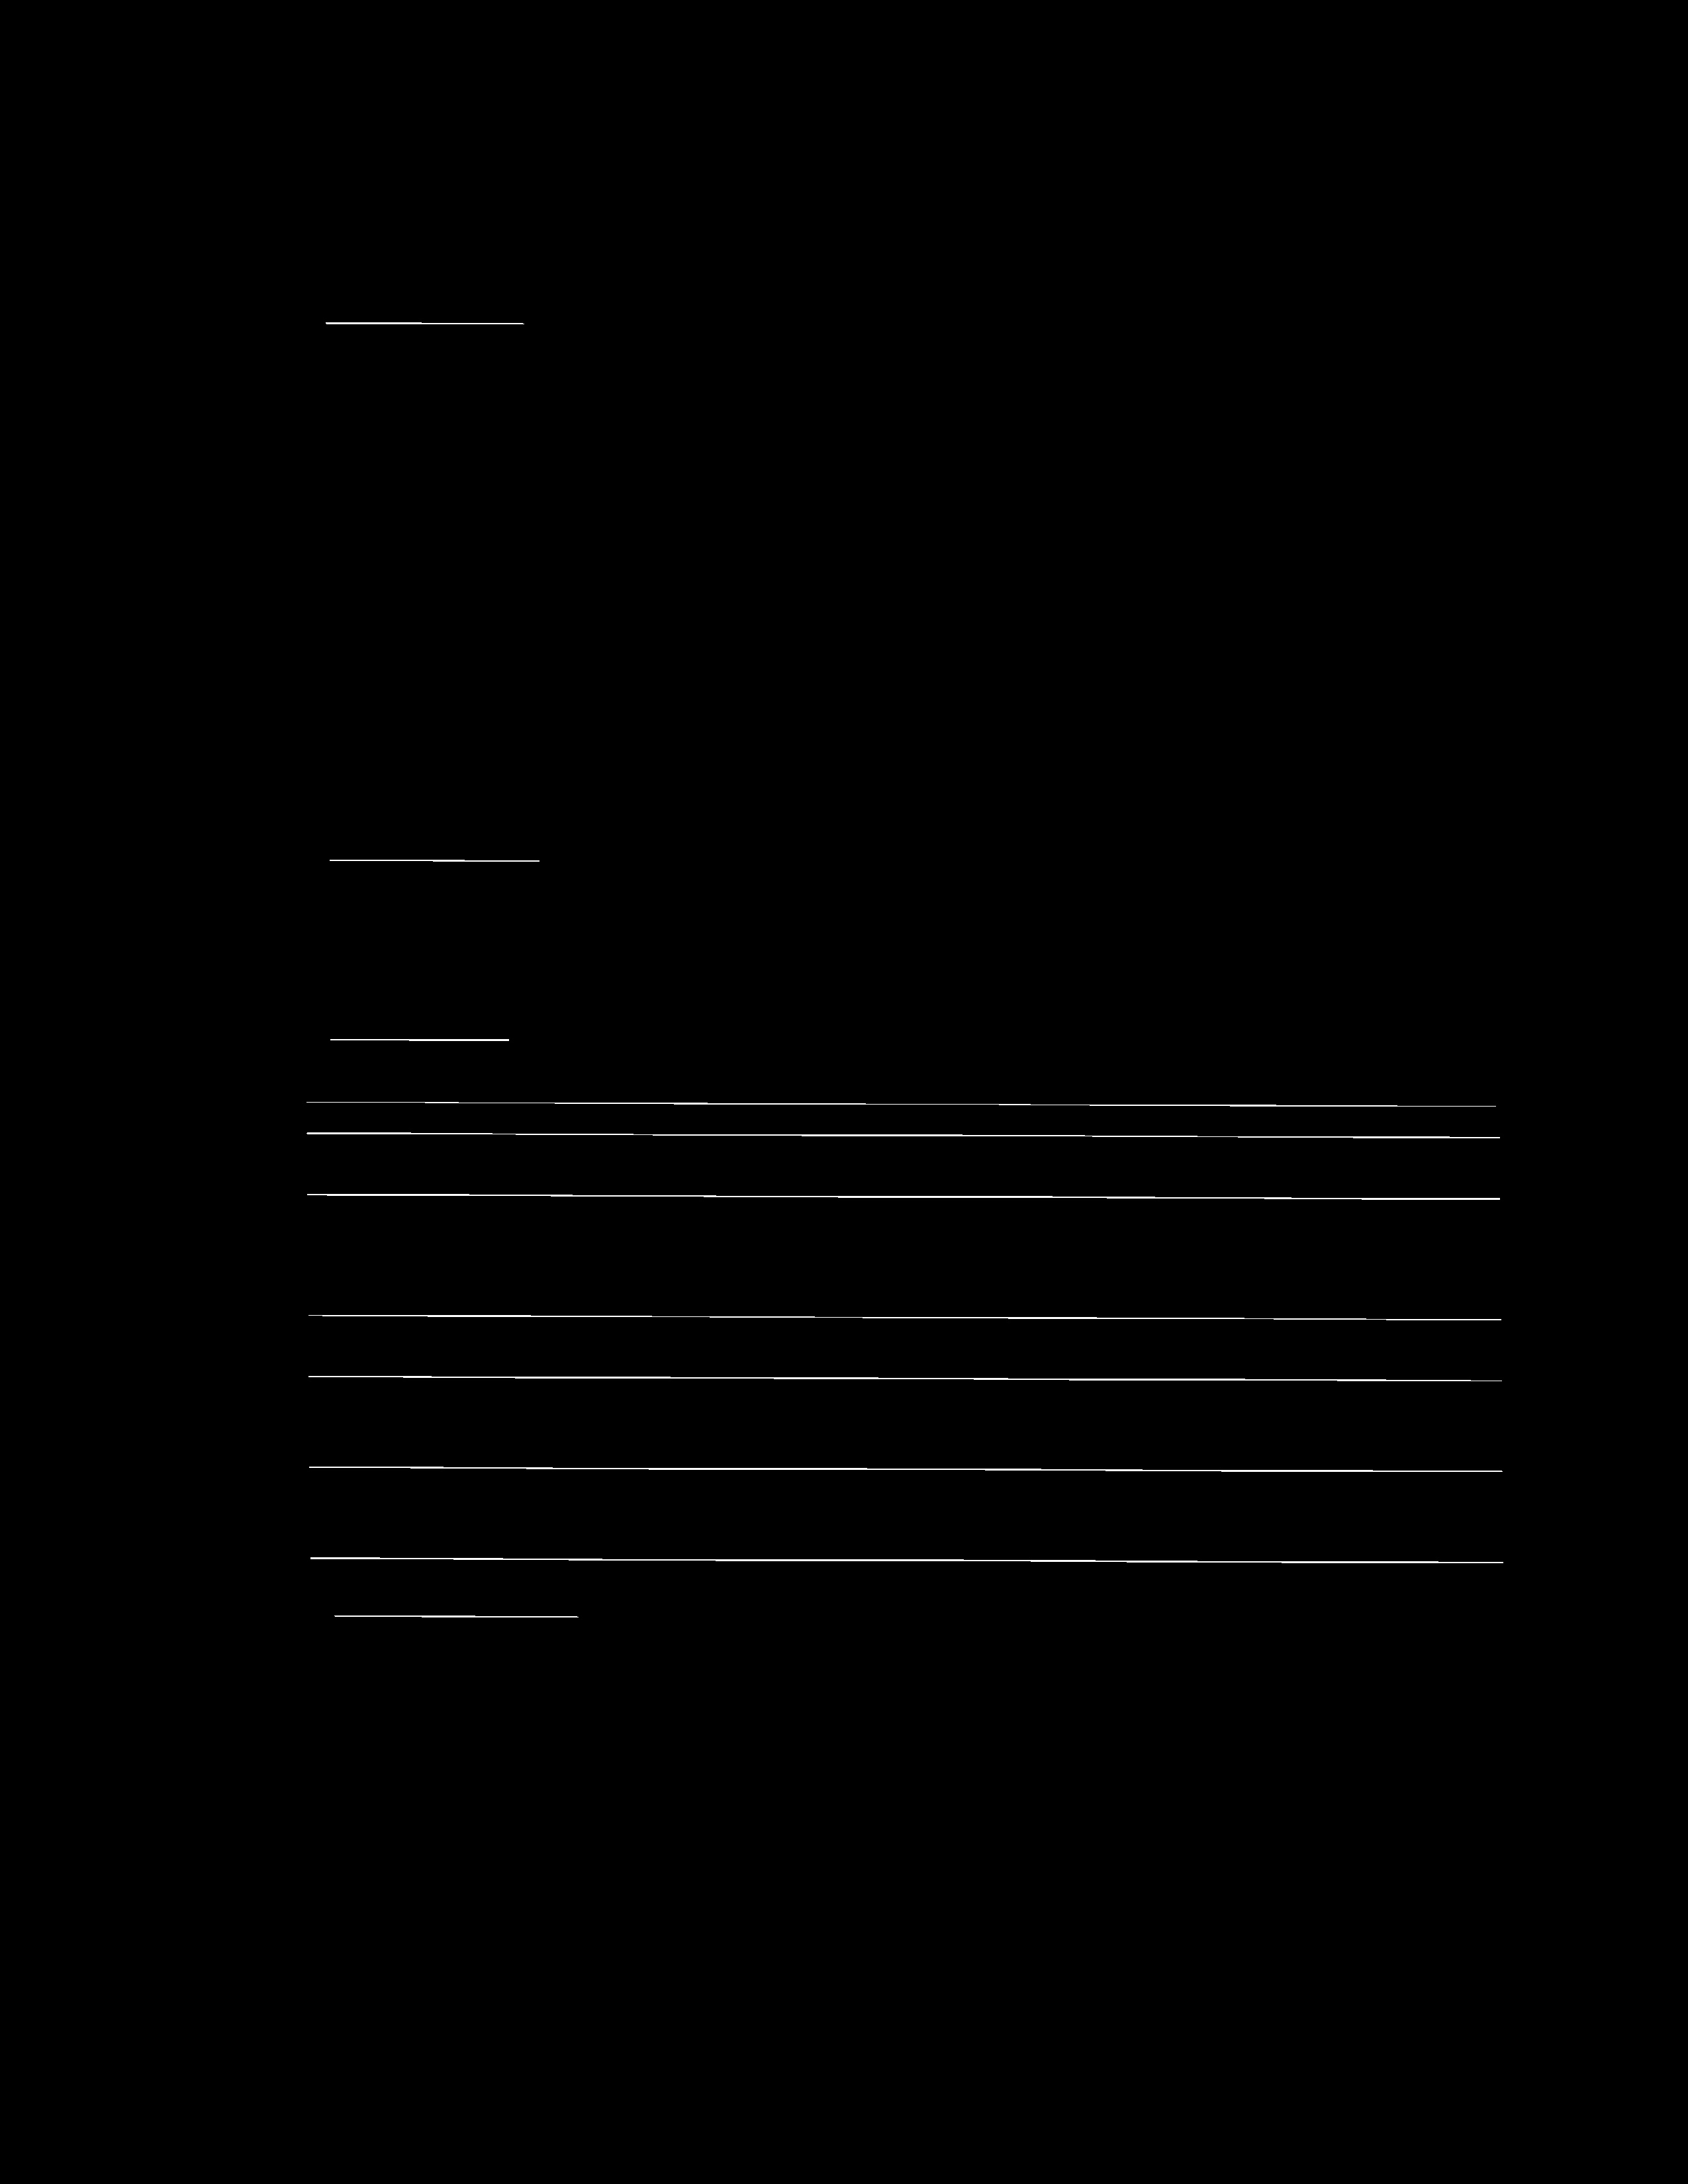

In [19]:
D(I('horizontal_lines.jpg'))

In [20]:
alpha = 0.5
beta = 1.0 - alpha
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("horizantal_and_vertical_lines.jpg", img_final_bin)

True

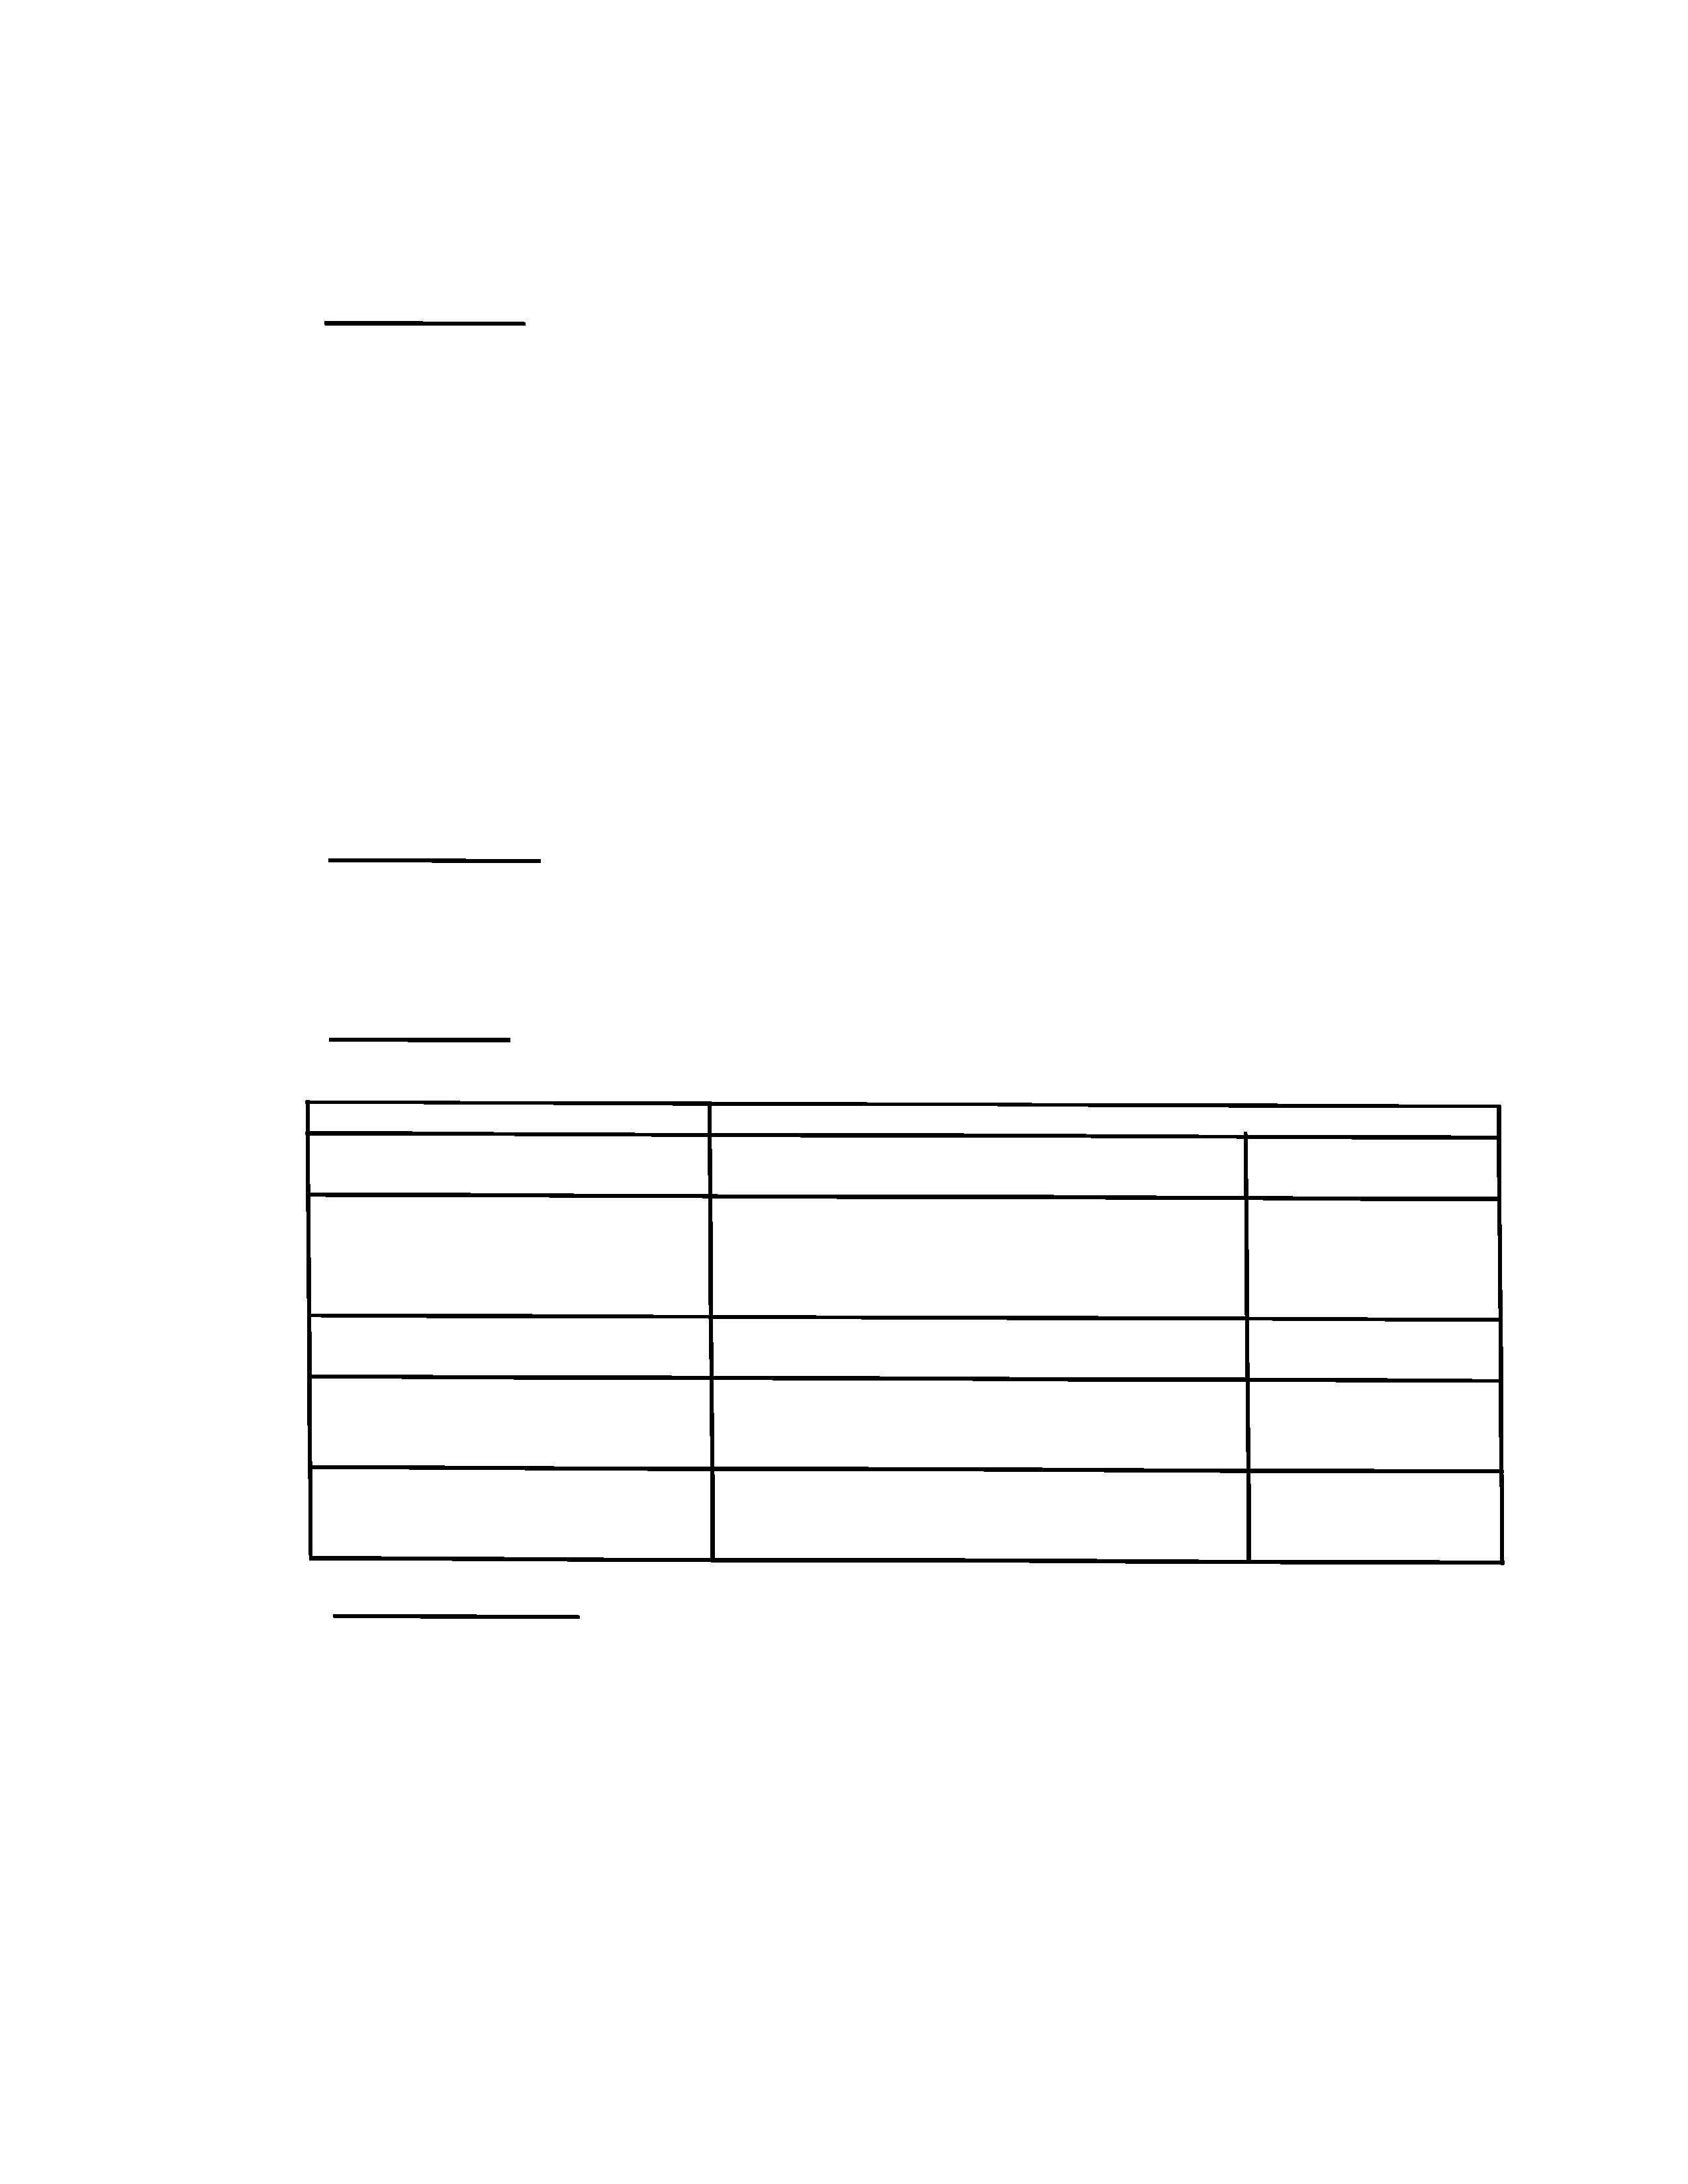

In [21]:
D(I('horizantal_and_vertical_lines.jpg'))

In [23]:
import os
if cv2.__version__.startswith("4."):
        contours, _ = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
else:
    _, contours, _ = cv2.findContours(
            img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [24]:
idx = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    idx += 1
    new_img = img[y:y+h, x:x+w]
    output_file = os.path.join("C:\\Users\\subbarao\Downloads\\Contracts\\One\\op\\", "{}.png".format(idx))
    cv2.imwrite(output_file, new_img)

cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
cv2.imwrite("img_contour.jpg", img)

True

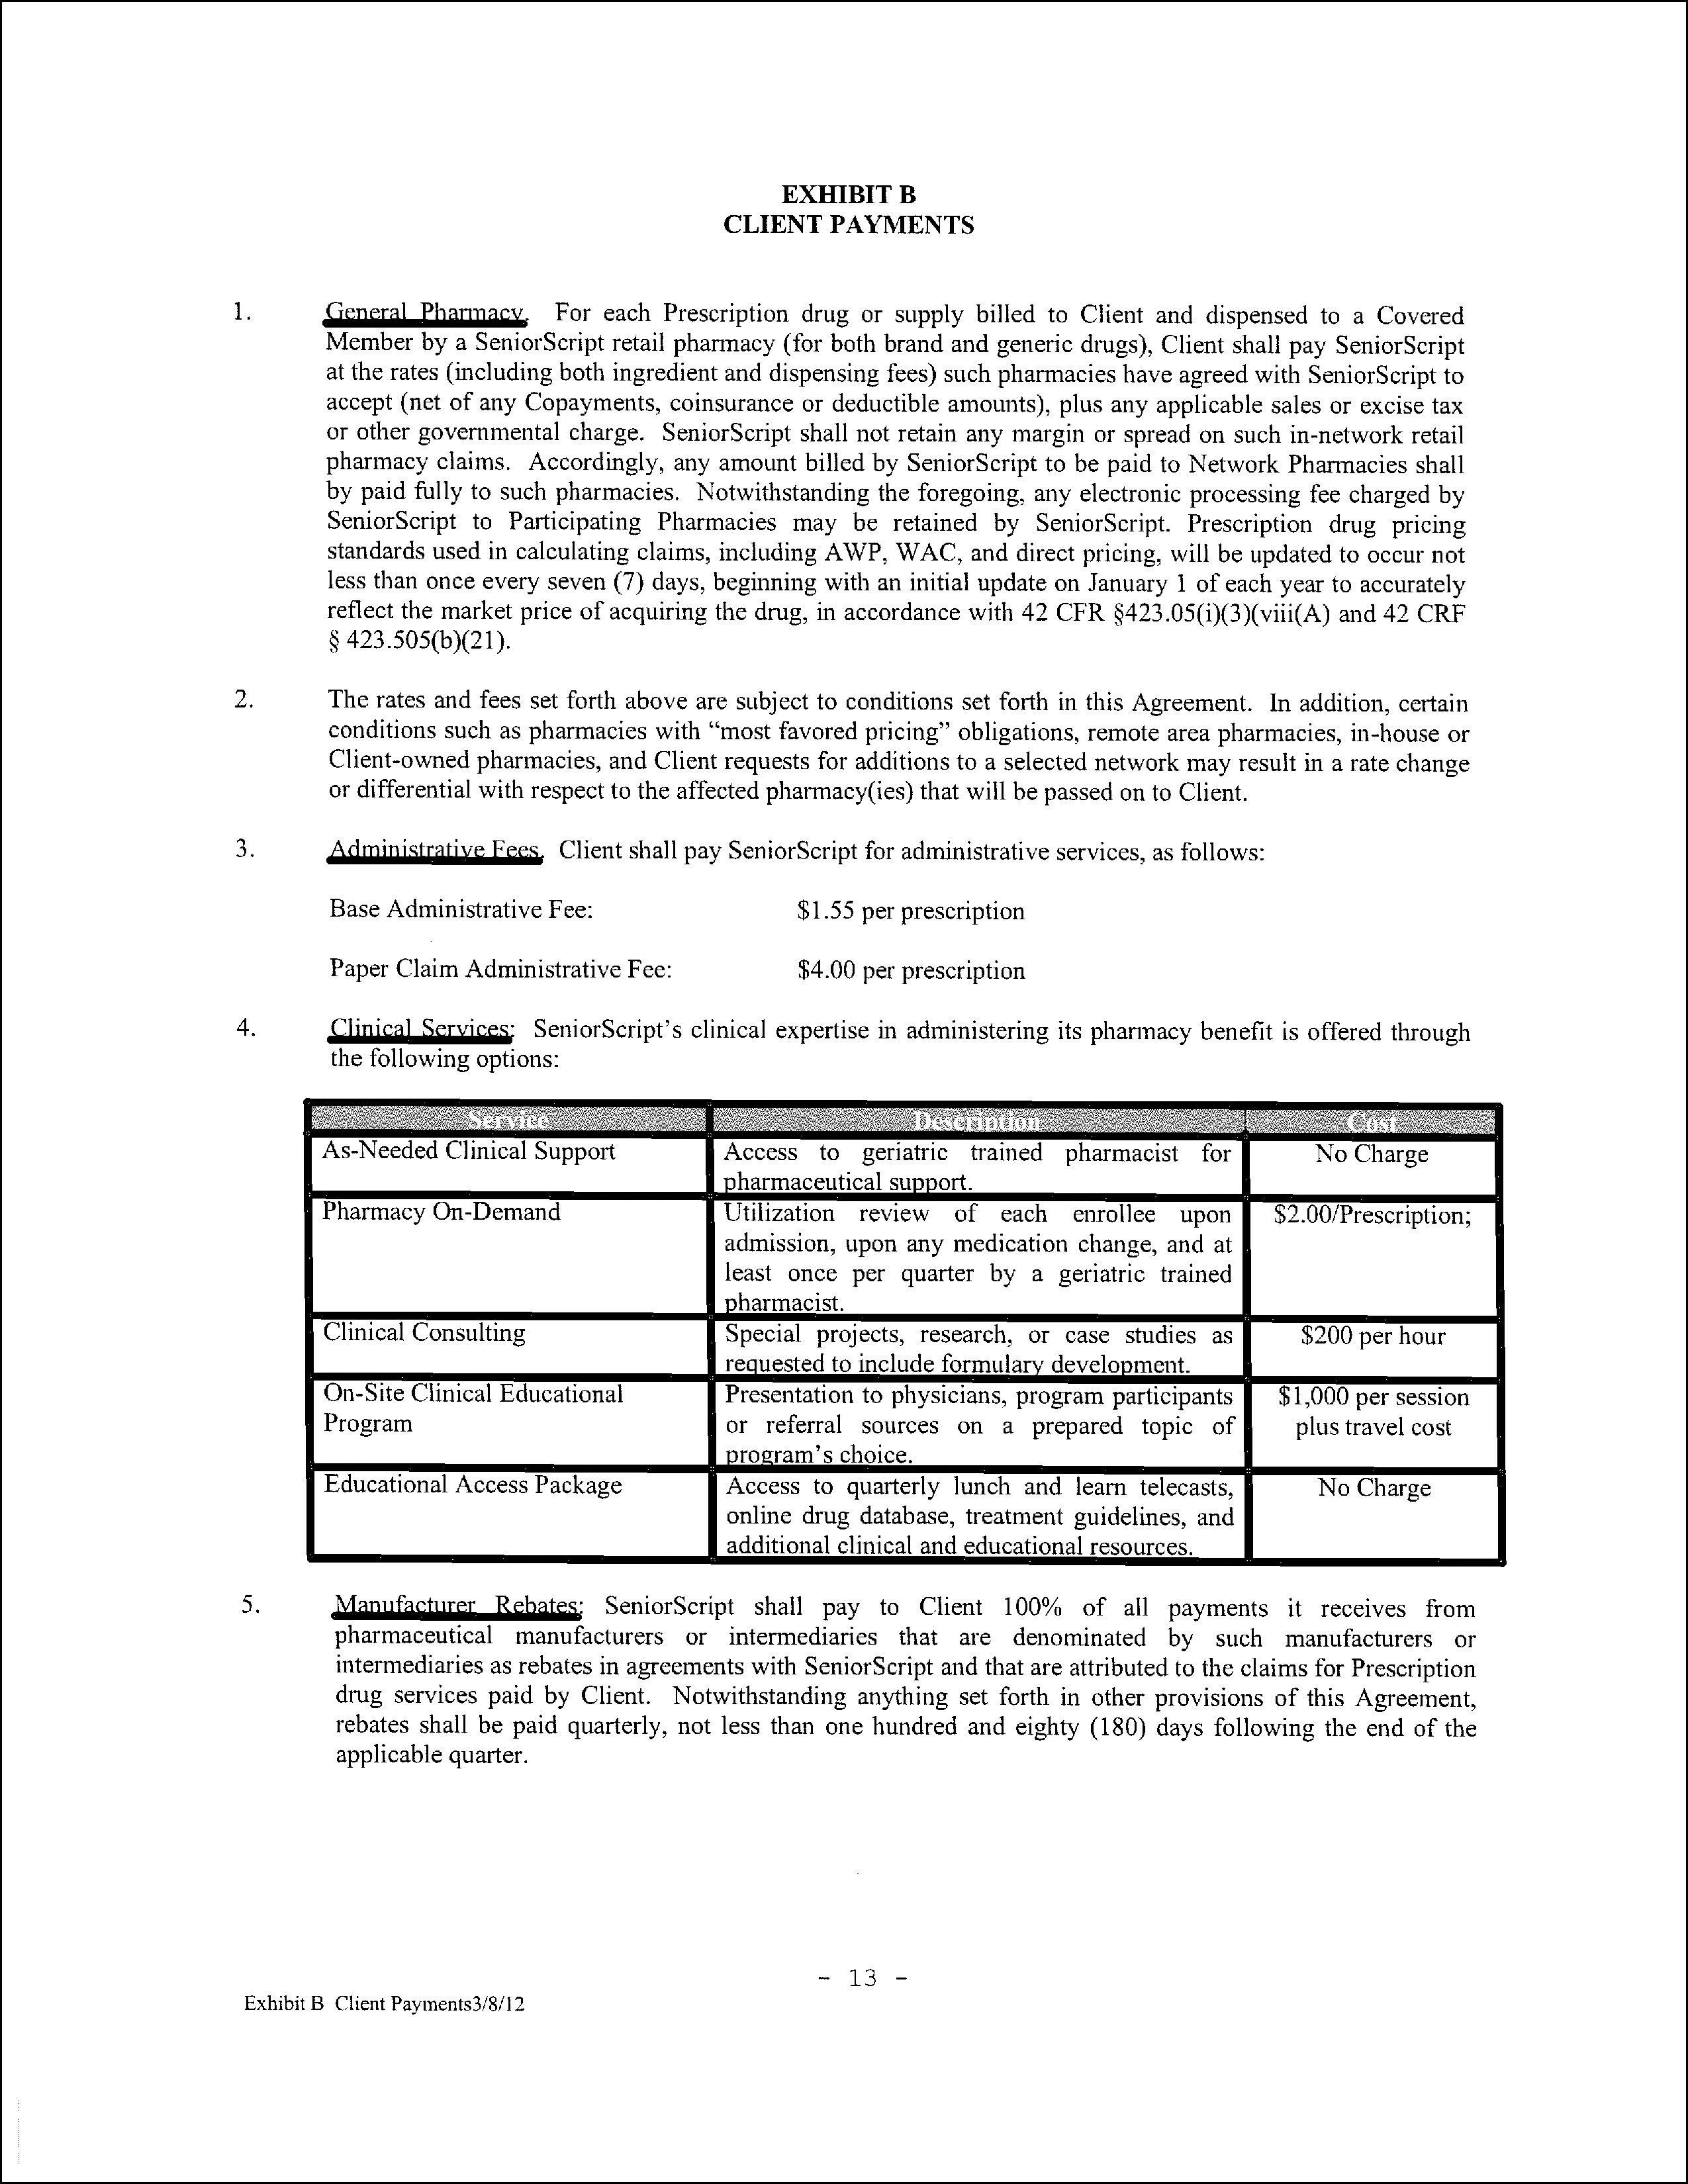

In [25]:
D(I('img_contour.jpg'))

In [27]:
reverse = False
i = 1
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(cnts, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda b: b[1][i], reverse=reverse))
idx=0
for x,y,w,h in boundingBoxes[1:]:
    idx+=1
    
    new_img = img[y:y+h, x:x+w]
    output_file = os.path.join("C:\\Users\\subbarao\Downloads\\Contracts\\One\\op1\\", "{}.png".format(idx))
    cv2.imwrite(output_file, new_img)

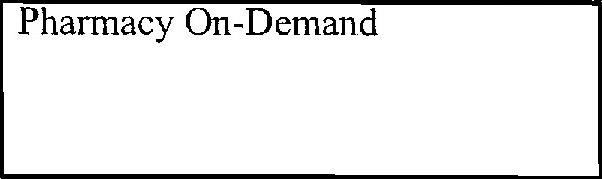

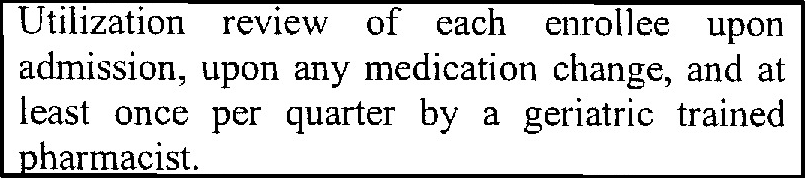

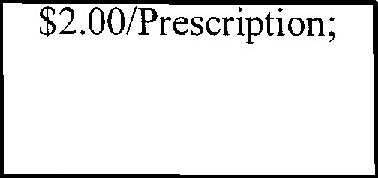

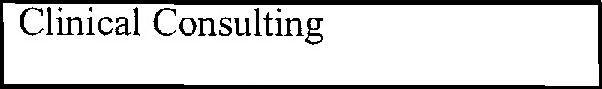

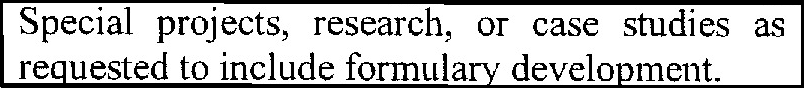

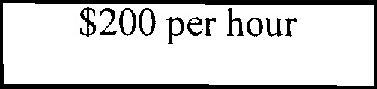

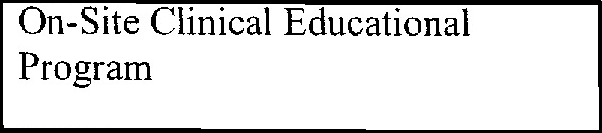

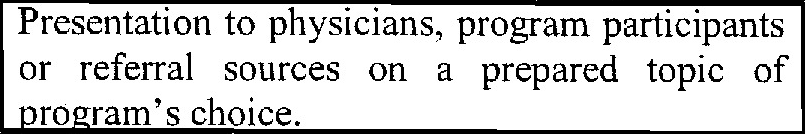

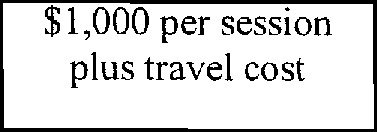

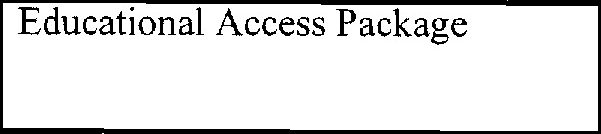

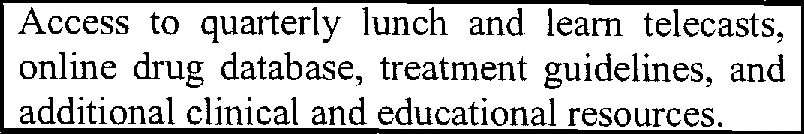

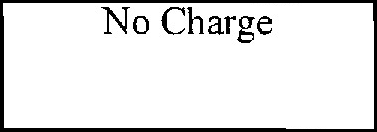

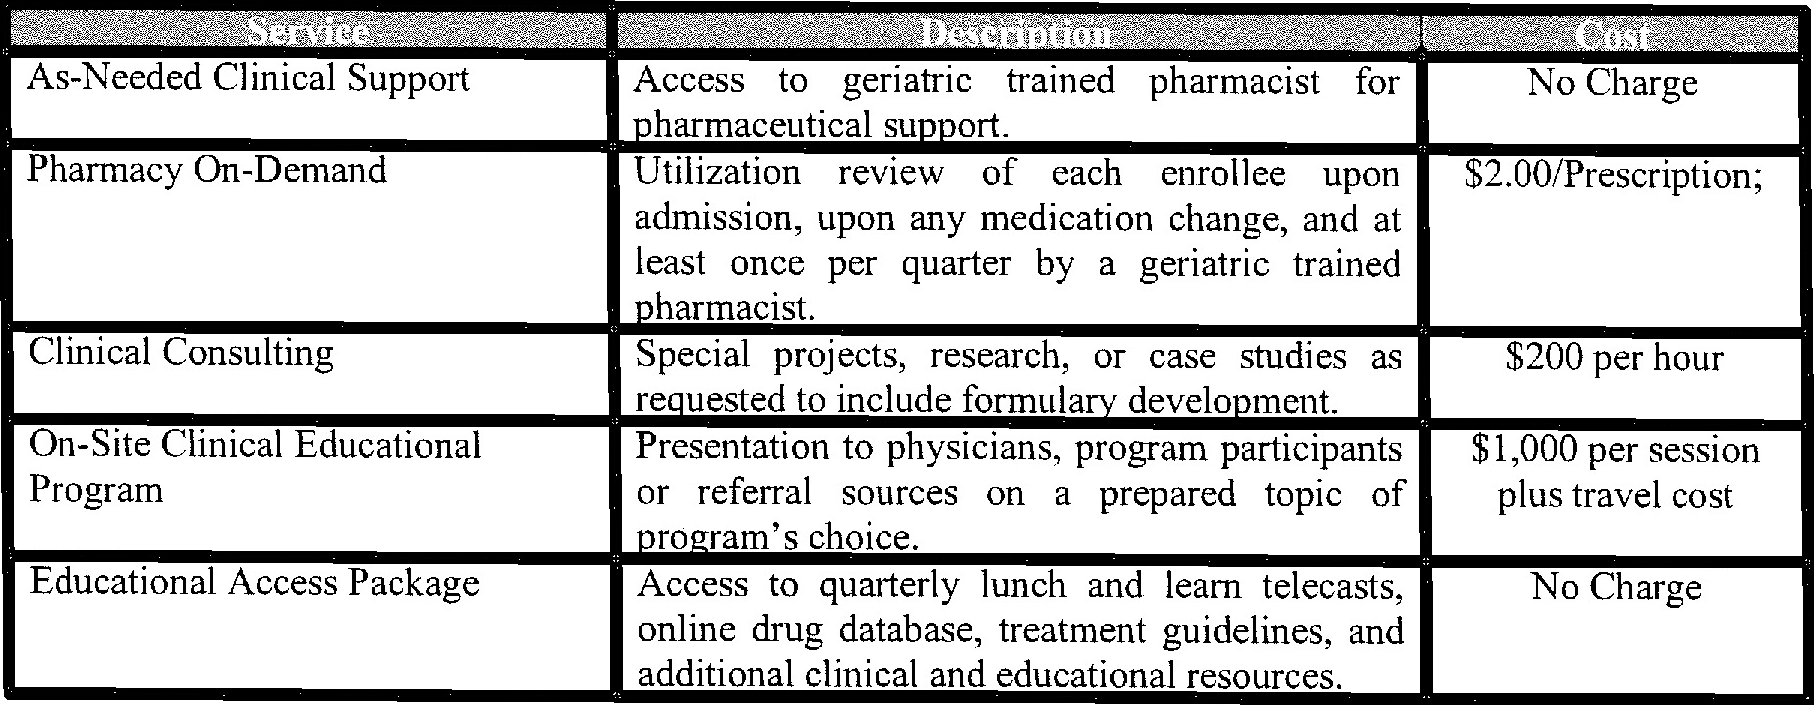

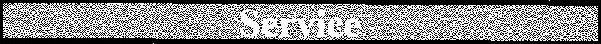

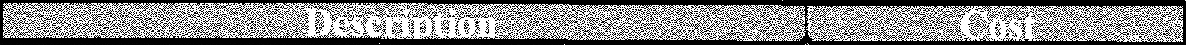

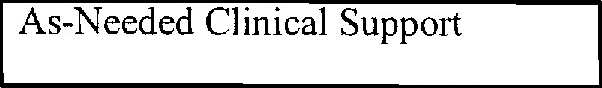

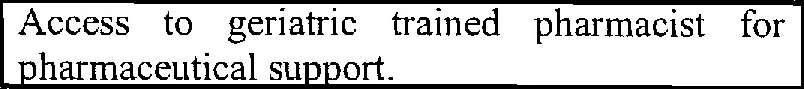

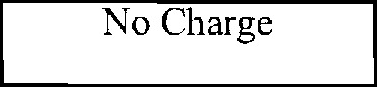

In [32]:
a='C:\\Users\\subbarao\\Downloads\\Contracts\\One\\op1\\'
for i in os.listdir(r'C:\Users\subbarao\Downloads\Contracts\One\op1'):
    D(I(a+i))